In [6]:
import matplotlib.pyplot as plt
import numpy as np
import ast, random, dataIO
from sklearn import linear_model
%matplotlib inline
reload(dataIO)

def get_touch_locations(userid):
    data = {}
    filenos = ["2", "6", "9"]
    
    for fileno in filenos:
        filename = "/home/dimitar/Desktop/Python/experiment/results/"+str(userid)+"_"+fileno+"up.txt"
        with open(filename, "r") as f:
            lines = f.read().splitlines()
            lines = map(lambda x: x.split('\t'), lines[1:])
            map(lambda x: data.setdefault(x[1],[]).append(ast.literal_eval(x[3])), lines)
        
    return data
    
locations = get_touch_locations(11)
centers = dataIO.get_key_centers()
filtered = dataIO.filter_touches(locations)

points = []
points_train = []
points_test = []
t_x_train = []
t_x_test = []
t_y_train = []
t_y_test = []
keys = filtered.keys()
#keys = ["z"]
touch_centers = []
        
for key in keys:
    touches = filtered[key]
    center = centers[key]
    random.shuffle(touches)
    
    for i in range(len(touches)):
        touch = touches[i]
        touch_centers.append(center)
        points.append(list(touch))      
        
        if i>7:
            #points_test.append(list(touch)+[touch[0]**2, touch[1]**2])
            points_test.append(list(touch))
            t_x_test.append(center[0]-touch[0])
            t_y_test.append(center[1]-touch[1])            
        else:
            #points_train.append(list(touch)+[touch[0]**2, touch[1]**2])
            points_train.append(list(touch))
            t_x_train.append(center[0]-touch[0])
            t_y_train.append(center[1]-touch[1])        
 
touch_centers = np.array(touch_centers)
points = np.array(points)

t_x_train = np.array(t_x_train)
t_x_test = np.array(t_x_test)
t_y_train = np.array(t_y_train)
t_y_test = np.array(t_y_test)

points_unz = np.array(map(lambda x: list(x) , zip(*points))) 
centers_unz = np.array(map(lambda x: list(x) , zip(*touch_centers)))

print("Mean squared error on x before regression: %.2f"
           % np.mean((points_unz[0] - centers_unz[0]) ** 2))

print("Mean squared error on y before regression: %.2f"
           % np.mean((points_unz[1] - centers_unz[1]) ** 2))
print

regr_x = linear_model.LinearRegression()
regr_y = linear_model.LinearRegression()

regr_x.fit(points_train, t_x_train)
regr_y.fit(points_train, t_y_train)

true, pred = t_x_test, regr_x.predict(points_test)

mse = np.mean((pred - true) ** 2)
print("Mean squared error on x: %.2f" %mse)

true, pred = t_y_test, regr_y.predict(points_test)

mse = np.mean((pred - true) ** 2)
print("Mean squared error on y: %.2f" %mse)

test_unz = zip(*points_test)
train_unz = zip(*points_train)

AttributeError: 'module' object has no attribute 'filter_touches'

### Make plot on x coordinate

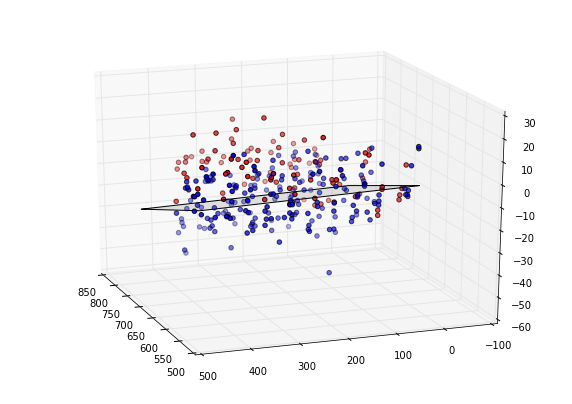

In [9]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_unz[0], train_unz[1], t_x_train, c='b', marker='o')
ax.scatter(test_unz[0], test_unz[1], true, c='r', marker='o')

coef = regr_x.coef_
w0 = regr_x.intercept_
line = lambda x1, x2: coef[0] * x1 + coef[1] * x2 + w0 

grid_x1, grid_x2 = np.mgrid[np.min(train_unz[0]):np.max(train_unz[0]):10j, 
                            np.min(train_unz[1]):np.max(train_unz[1]):10j]
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2),alpha=0.1, color='k')

ax.view_init(elev=20 , azim=160)
plt.show()

### Make plot on y coordinate

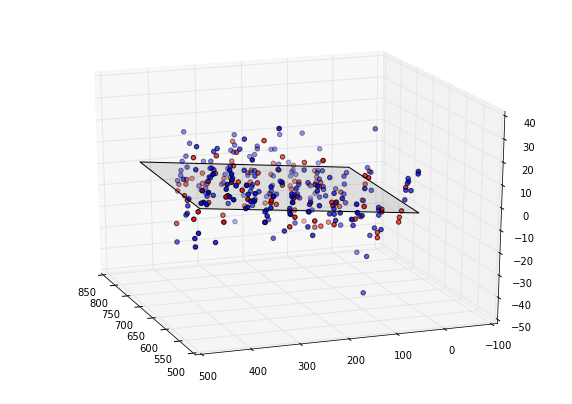

In [10]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_unz[0], train_unz[1], t_y_train, c='b', marker='o')
ax.scatter(test_unz[0], test_unz[1], true, c='r', marker='o')

coef = regr_y.coef_
w0 = regr_y.intercept_
line = lambda x1, x2: coef[0] * x1 + coef[1] * x2+ w0

grid_x1, grid_x2 = np.mgrid[np.min(train_unz[0]):np.max(train_unz[0]):10j, 
                            np.min(train_unz[1]):np.max(train_unz[1]):10j]
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2),alpha=0.1, color='k')

ax.view_init(elev=20 , azim=160)

plt.show()

### Plot test touches

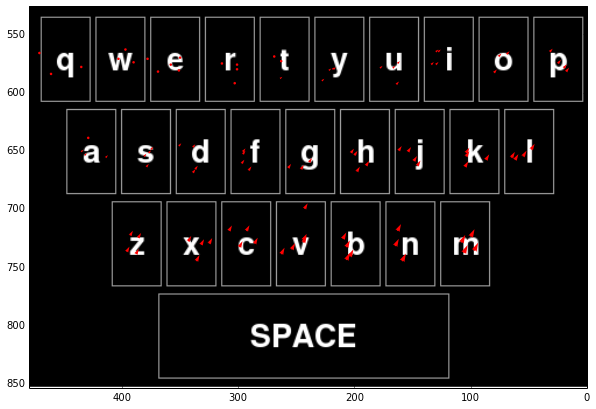

In [410]:
fig = plt.figure(figsize=(10, 7))
# print points_test
# print test_unz

pred_x = regr_x.predict(points_test)
pred_y = regr_y.predict(points_test)

#print t_x_test
# print pred_x

# print t_y_test
# print pred_y

im = plt.imread("../keyboard.png")
#[left, right, bottom, top]
implot = plt.imshow(im, extent=[480, 0, 854, 526])

q = plt.quiver(test_unz[1], test_unz[0], pred_y, pred_x, color='red', width = 0.005, angles='xy', scale = 480)
#q = plt.quiver(test_unz[0], test_unz[1], pred_x, pred_y, color='red', width = 0.005, angles='xy', scale=52)
#plt.xlim(700,750)
#plt.ylim(360,410)

plt.show()

### Plot offset model (scaled)

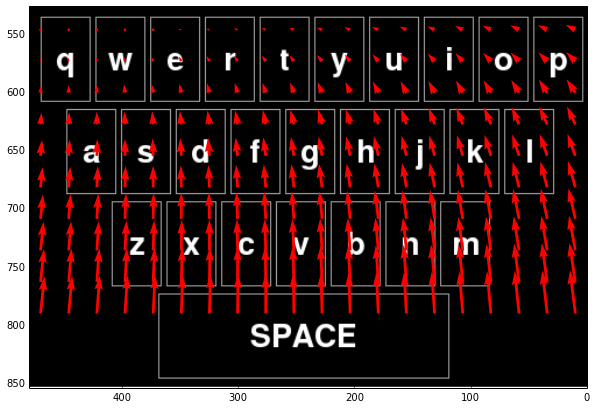

In [6]:
nx, ny = (20, 10)
y = np.linspace(10, 470, nx)
x = np.linspace(546, 790, ny)
xv, yv = np.meshgrid(x, y)
xy = np.reshape(np.dstack((xv, yv)), (nx*ny, 2))
xy_unz = zip(*xy)

fig = plt.figure(figsize=(10, 7))

pred_x = regr_x.predict(xy)
pred_y = regr_y.predict(xy)

im = plt.imread("../keyboard.png")
implot = plt.imshow(im, extent=[480, 0, 854, 526])

q = plt.quiver(xy_unz[1], xy_unz[0], pred_y, pred_x, color='red', width = 0.005, angles='xy')

plt.show()

In [9]:
import copy
from matplotlib import pyplot
%matplotlib inline

fig = plt.figure(figsize=(10, 7))

someletters = copy.copy(filtered["g"])
someletters += copy.copy(filtered["c"])
someletters += copy.copy(filtered["a"])
someletters += copy.copy(filtered["i"])
some_unz = zip(*someletters)

pred_x = regr_x.predict(someletters)
pred_y = regr_y.predict(someletters)

im = plt.imread("../keyboard.png")
implot = plt.imshow(im, extent=[480, 0, 854, 526])

plt.scatter(some_unz[1], some_unz[0], color='red', marker='.')
#q = plt.quiver(some_unz[1], some_unz[0], pred_y, pred_x, color='red', width = 0.005, angles='xy')

plt.show()

fig = plt.figure(figsize=(10, 7))

someletters = copy.copy(filtered["g"])
someletters += copy.copy(filtered["c"])
someletters += copy.copy(filtered["a"])
someletters += copy.copy(filtered["i"])
some_unz = zip(*someletters)

pred_x = regr_x.predict(someletters)
pred_y = regr_y.predict(someletters)

im = plt.imread("../keyboard.png")
implot = plt.imshow(im, extent=[480, 0, 854, 526])

plt.scatter(some_unz[1], some_unz[0], color='red', marker='.')
#q = plt.quiver(some_unz[1], some_unz[0], pred_y, pred_x, color='red', width = 0.005, angles='xy')

plt.show()

NameError: name 'filtered' is not defined

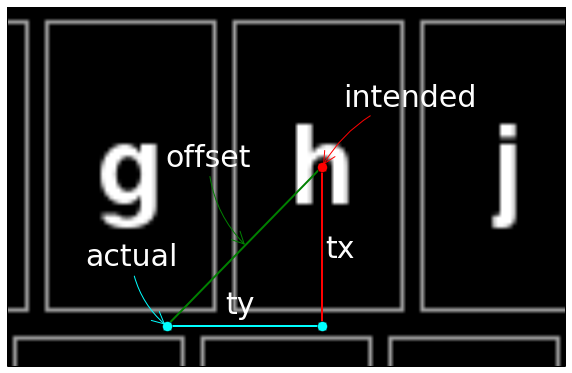

In [186]:
fig = plt.figure(1,figsize=(10,7))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(210,350), ylim=(175, 85))

im = plt.imread("../../keyboard.png")
implot = plt.imshow(im)
#, extent=[0, 64, 92, 0])

#fig= plt.figure(figsize=(4, 6))

x = [289, 250]
y = [125, 165]
plt.plot(x, y, linewidth = 2.0, marker = 'o', color = 'green', markersize = 10)

x = [289, 289]
y = [125, 165]
plt.plot(x, y, linewidth = 2.0, marker = 'o', color = 'r', markersize = 10)

x = [250, 289]
y = [165, 165]
plt.plot(x, y, linewidth = 2.0, marker = 'o', color = 'cyan', markersize = 10)

ax.annotate('offset', xy=(270, 145), color = 'w', xytext=(250, 125), size = 30,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='green'))

ax.annotate('intended', xy=(289, 125), color = 'w', xytext=(295, 110), size = 30,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='red'))

ax.annotate('actual', xy=(250, 165), color = 'w', xytext=(230, 150), size = 30,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='cyan'))


ax.annotate('tx', xy=(290, 150), color='w', xytext = (290, 148), size=30)
ax.annotate('ty', xy=(290, 150), color='w', xytext = (265, 162), size = 30)

plt.xticks(())
plt.yticks(())

plt.savefig('/home/dimitar/Desktop/Latex/L5Project/mpaper/img/key_offset.png', bbox_inches='tight', dpi=400)
plt.show()